In [499]:
#Importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

## Gathering the relevant tables

In [500]:
calories = pd.read_csv("C:/Users/USER/Downloads/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")

In [501]:
intensities = pd.read_csv("C:/Users/USER/Downloads/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

In [502]:
steps = pd.read_csv("C:/Users/USER/Downloads/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

In [503]:
daily_activities = pd.read_csv("C:/Users/USER/Downloads/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

## Assessment and data cleaning

In [504]:
#Checking the basic information in the calories table
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [505]:
#Checking the basic information in the intensities table
intensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [506]:
#Checking the basic information in the steps table
steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [507]:
#Converting the 'ActivityHour' dataatype in calories table to datetime
calories["ActivityHour"] = pd.to_datetime(calories["ActivityHour"])

In [508]:
#Checking for the change
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            22099 non-null  int64         
 1   ActivityHour  22099 non-null  datetime64[ns]
 2   Calories      22099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 518.1 KB


In [509]:
#Extracting the time from the 'ActivityHour' Column and renaming the column
calories["Times"] = calories["ActivityHour"].dt.time

In [510]:
calories

,Id,ActivityHour,Calories,Times
0,1503960366,2016-04-12 00:00:00,81,00:00:00
1,1503960366,2016-04-12 01:00:00,61,01:00:00
2,1503960366,2016-04-12 02:00:00,59,02:00:00
3,1503960366,2016-04-12 03:00:00,47,03:00:00
4,1503960366,2016-04-12 04:00:00,48,04:00:00
...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,126,10:00:00
22095,8877689391,2016-05-12 11:00:00,192,11:00:00
22096,8877689391,2016-05-12 12:00:00,321,12:00:00
22097,8877689391,2016-05-12 13:00:00,101,13:00:00


In [511]:
#Converting the 'ActivityHour' dataatype in calories table to datetime
calories["ActivityHour"] = pd.to_datetime(calories["ActivityHour"], format="%m/%d/%Y %H:%M:%S %p")

In [512]:
calories

,Id,ActivityHour,Calories,Times
0,1503960366,2016-04-12 00:00:00,81,00:00:00
1,1503960366,2016-04-12 01:00:00,61,01:00:00
2,1503960366,2016-04-12 02:00:00,59,02:00:00
3,1503960366,2016-04-12 03:00:00,47,03:00:00
4,1503960366,2016-04-12 04:00:00,48,04:00:00
...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,126,10:00:00
22095,8877689391,2016-05-12 11:00:00,192,11:00:00
22096,8877689391,2016-05-12 12:00:00,321,12:00:00
22097,8877689391,2016-05-12 13:00:00,101,13:00:00


In [513]:
#Converting the ActivityHour datatype to datetype
calories["ActivityHour"] = pd.to_datetime(calories["ActivityHour"].dt.date)
calories

,Id,ActivityHour,Calories,Times
0,1503960366,2016-04-12,81,00:00:00
1,1503960366,2016-04-12,61,01:00:00
2,1503960366,2016-04-12,59,02:00:00
3,1503960366,2016-04-12,47,03:00:00
4,1503960366,2016-04-12,48,04:00:00
...,...,...,...,...
22094,8877689391,2016-05-12,126,10:00:00
22095,8877689391,2016-05-12,192,11:00:00
22096,8877689391,2016-05-12,321,12:00:00
22097,8877689391,2016-05-12,101,13:00:00


In [514]:
#Creating a new table, rearranging the columns and checking it out
new_calories = ['Id', 'ActivityHour', 'Times', 'Calories']
calories = calories.reindex(columns = new_calories)
calories.head()

,Id,ActivityHour,Times,Calories
0,1503960366,2016-04-12,00:00:00,81
1,1503960366,2016-04-12,01:00:00,61
2,1503960366,2016-04-12,02:00:00,59
3,1503960366,2016-04-12,03:00:00,47
4,1503960366,2016-04-12,04:00:00,48


In [515]:
#Converting the ActivityHour datatype to datetype 
intensities["ActivityHour"] = pd.to_datetime(intensities["ActivityHour"])

In [516]:
#Extracting the time from the 'ActivityHour' Column and renaming the column
intensities["Times"] = intensities["ActivityHour"].dt.time
intensities

,Id,ActivityHour,TotalIntensity,AverageIntensity,Times
0,1503960366,2016-04-12 00:00:00,20,0.333333,00:00:00
1,1503960366,2016-04-12 01:00:00,8,0.133333,01:00:00
2,1503960366,2016-04-12 02:00:00,7,0.116667,02:00:00
3,1503960366,2016-04-12 03:00:00,0,0.000000,03:00:00
4,1503960366,2016-04-12 04:00:00,0,0.000000,04:00:00
...,...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,12,0.200000,10:00:00
22095,8877689391,2016-05-12 11:00:00,29,0.483333,11:00:00
22096,8877689391,2016-05-12 12:00:00,93,1.550000,12:00:00
22097,8877689391,2016-05-12 13:00:00,6,0.100000,13:00:00


In [517]:
#Converting the 'ActivityHour' datatype to datetype
intensities["ActivityHour"] = pd.to_datetime(intensities["ActivityHour"], format="%m/%d/%Y %H:%M:%S %p")
intensities

,Id,ActivityHour,TotalIntensity,AverageIntensity,Times
0,1503960366,2016-04-12 00:00:00,20,0.333333,00:00:00
1,1503960366,2016-04-12 01:00:00,8,0.133333,01:00:00
2,1503960366,2016-04-12 02:00:00,7,0.116667,02:00:00
3,1503960366,2016-04-12 03:00:00,0,0.000000,03:00:00
4,1503960366,2016-04-12 04:00:00,0,0.000000,04:00:00
...,...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,12,0.200000,10:00:00
22095,8877689391,2016-05-12 11:00:00,29,0.483333,11:00:00
22096,8877689391,2016-05-12 12:00:00,93,1.550000,12:00:00
22097,8877689391,2016-05-12 13:00:00,6,0.100000,13:00:00


In [518]:
#Converting the datatype to date format
intensities["ActivityHour"] = pd.to_datetime(intensities["ActivityHour"].dt.date)
intensities

,Id,ActivityHour,TotalIntensity,AverageIntensity,Times
0,1503960366,2016-04-12,20,0.333333,00:00:00
1,1503960366,2016-04-12,8,0.133333,01:00:00
2,1503960366,2016-04-12,7,0.116667,02:00:00
3,1503960366,2016-04-12,0,0.000000,03:00:00
4,1503960366,2016-04-12,0,0.000000,04:00:00
...,...,...,...,...,...
22094,8877689391,2016-05-12,12,0.200000,10:00:00
22095,8877689391,2016-05-12,29,0.483333,11:00:00
22096,8877689391,2016-05-12,93,1.550000,12:00:00
22097,8877689391,2016-05-12,6,0.100000,13:00:00


In [519]:
#Creating a new table, rearranging the columns and checking it out
new_intensities = ['Id', 'ActivityHour', 'Times', 'TotalIntensity', 'AverageIntensity']
intensities = intensities.reindex(columns = new_intensities)
intensities.head()

,Id,ActivityHour,Times,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12,00:00:00,20,0.333333
1,1503960366,2016-04-12,01:00:00,8,0.133333
2,1503960366,2016-04-12,02:00:00,7,0.116667
3,1503960366,2016-04-12,03:00:00,0,0.000000
4,1503960366,2016-04-12,04:00:00,0,0.000000


In [520]:
#Converting the datatype to datatime format
steps["ActivityHour"] = pd.to_datetime(steps["ActivityHour"])

In [521]:
steps["Times"] = steps["ActivityHour"].dt.time
steps

,Id,ActivityHour,StepTotal,Times
0,1503960366,2016-04-12 00:00:00,373,00:00:00
1,1503960366,2016-04-12 01:00:00,160,01:00:00
2,1503960366,2016-04-12 02:00:00,151,02:00:00
3,1503960366,2016-04-12 03:00:00,0,03:00:00
4,1503960366,2016-04-12 04:00:00,0,04:00:00
...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,514,10:00:00
22095,8877689391,2016-05-12 11:00:00,1407,11:00:00
22096,8877689391,2016-05-12 12:00:00,3135,12:00:00
22097,8877689391,2016-05-12 13:00:00,307,13:00:00


In [522]:
#converting the activityhour datatype to date format
steps["ActivityHour"] = pd.to_datetime(steps["ActivityHour"], format="%m/%d/%Y %H:%M:%S %p")

In [523]:
steps["ActivityHour"] = pd.to_datetime(steps["ActivityHour"].dt.date)
steps

,Id,ActivityHour,StepTotal,Times
0,1503960366,2016-04-12,373,00:00:00
1,1503960366,2016-04-12,160,01:00:00
2,1503960366,2016-04-12,151,02:00:00
3,1503960366,2016-04-12,0,03:00:00
4,1503960366,2016-04-12,0,04:00:00
...,...,...,...,...
22094,8877689391,2016-05-12,514,10:00:00
22095,8877689391,2016-05-12,1407,11:00:00
22096,8877689391,2016-05-12,3135,12:00:00
22097,8877689391,2016-05-12,307,13:00:00


In [524]:
#Creating a new table, rearranging the columns and checking it out
new_steps = ['Id', 'ActivityHour', 'Times', 'StepTotal']
steps = steps.reindex(columns = new_steps)
steps.head()

,Id,ActivityHour,Times,StepTotal
0,1503960366,2016-04-12,00:00:00,373
1,1503960366,2016-04-12,01:00:00,160
2,1503960366,2016-04-12,02:00:00,151
3,1503960366,2016-04-12,03:00:00,0
4,1503960366,2016-04-12,04:00:00,0


In [525]:
#Merging the calories and intensities tables together
merged_1 = calories.merge(intensities)

In [526]:
merged_1

,Id,ActivityHour,Times,Calories,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12,00:00:00,81,20,0.333333
1,1503960366,2016-04-12,01:00:00,61,8,0.133333
2,1503960366,2016-04-12,02:00:00,59,7,0.116667
3,1503960366,2016-04-12,03:00:00,47,0,0.000000
4,1503960366,2016-04-12,04:00:00,48,0,0.000000
...,...,...,...,...,...,...
22094,8877689391,2016-05-12,10:00:00,126,12,0.200000
22095,8877689391,2016-05-12,11:00:00,192,29,0.483333
22096,8877689391,2016-05-12,12:00:00,321,93,1.550000
22097,8877689391,2016-05-12,13:00:00,101,6,0.100000


In [527]:
#Merging the merged columns to the steps table
merged = merged_1.merge(steps)
merged

,Id,ActivityHour,Times,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,2016-04-12,00:00:00,81,20,0.333333,373
1,1503960366,2016-04-12,01:00:00,61,8,0.133333,160
2,1503960366,2016-04-12,02:00:00,59,7,0.116667,151
3,1503960366,2016-04-12,03:00:00,47,0,0.000000,0
4,1503960366,2016-04-12,04:00:00,48,0,0.000000,0
...,...,...,...,...,...,...,...
22094,8877689391,2016-05-12,10:00:00,126,12,0.200000,514
22095,8877689391,2016-05-12,11:00:00,192,29,0.483333,1407
22096,8877689391,2016-05-12,12:00:00,321,93,1.550000,3135
22097,8877689391,2016-05-12,13:00:00,101,6,0.100000,307


In [528]:
#dropping irrelevant columns
merged.drop(['Id', 'ActivityHour','AverageIntensity'], axis=1)

,Times,Calories,TotalIntensity,StepTotal
0,00:00:00,81,20,373
1,01:00:00,61,8,160
2,02:00:00,59,7,151
3,03:00:00,47,0,0
4,04:00:00,48,0,0
...,...,...,...,...
22094,10:00:00,126,12,514
22095,11:00:00,192,29,1407
22096,12:00:00,321,93,3135
22097,13:00:00,101,6,307


In [529]:
#grouping the merged column by hours of the day
merged.groupby(['Times'])['Calories', 'TotalIntensity', 'StepTotal'].agg({'sum'})

<ipython-input-529-376bcf3073b2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merged.groupby(['Times'])['Calories', 'TotalIntensity', 'StepTotal'].agg({'sum'})


,Calories,TotalIntensity,StepTotal
,sum,sum,sum
Times,,,
00:00:00,67066,1989,39404
01:00:00,65464,1324,21555
02:00:00,64551,974,15964
03:00:00,63013,414,5996
04:00:00,63620,590,11836
05:00:00,76152,4614,40886
06:00:00,80994,7235,166191
07:00:00,87959,9993,284932


In [530]:
#Converting the new table above into a dataframe
mergedd = pd.DataFrame(merged.groupby(['Times'])['Calories', 'TotalIntensity', 'StepTotal'].agg({'sum'}))

<ipython-input-530-05f2a515ee0c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mergedd = pd.DataFrame(merged.groupby(['Times'])['Calories', 'TotalIntensity', 'StepTotal'].agg({'sum'}))


In [531]:
mergedd

,Calories,TotalIntensity,StepTotal
,sum,sum,sum
Times,,,
00:00:00,67066,1989,39404
01:00:00,65464,1324,21555
02:00:00,64551,974,15964
03:00:00,63013,414,5996
04:00:00,63620,590,11836
05:00:00,76152,4614,40886
06:00:00,80994,7235,166191
07:00:00,87959,9993,284932


In [532]:
#Reseting the table to include the 'Time' column into table
mergedd = mergedd.reset_index()
mergedd

,Times,Calories,TotalIntensity,StepTotal
,,sum,sum,sum
0,00:00:00,67066,1989,39404
1,01:00:00,65464,1324,21555
2,02:00:00,64551,974,15964
3,03:00:00,63013,414,5996
4,04:00:00,63620,590,11836
5,05:00:00,76152,4614,40886
6,06:00:00,80994,7235,166191
7,07:00:00,87959,9993,284932
8,08:00:00,96207,13656,398044


In [533]:
#Checking for the basic information of the new table
mergedd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   (Times, )              24 non-null     object
 1   (Calories, sum)        24 non-null     int64 
 2   (TotalIntensity, sum)  24 non-null     int64 
 3   (StepTotal, sum)       24 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 896.0+ bytes


In [534]:
#Assessing the daily_activities table
daily_activities.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [535]:
#Checking for the basic information
daily_activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [536]:
#finding the total sum of the distance and making a new column for the sum
daily_activities['Total_distance'] = daily_activities[['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance']].sum(axis=1)
daily_activities

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Total_distance
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,8.49
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,6.97
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,6.75
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,6.23
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,8.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,8.08
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,18.14
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,8.09
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,19.52


In [537]:
#Converting the above table into a dataframe
distance = pd.DataFrame(daily_activities[['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance']].sum())
distance

,0
VeryActiveDistance,1412.520000
ModeratelyActiveDistance,533.489998
LightActiveDistance,3140.370000
SedentaryActiveDistance,1.510000


In [538]:
#Conversion to dataframe for analysis
df_distance = pd.DataFrame({'ActiveDistance': ['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance'],
                   'Distance': [1412.520000, 533.489998, 3140.370000, 1.510000]})

In [539]:
df_distance

,ActiveDistance,Distance
0,VeryActiveDistance,1412.520000
1,ModeratelyActiveDistance,533.489998
2,LightActiveDistance,3140.370000
3,SedentaryActiveDistance,1.510000


In [540]:
#Getting the total minutes as a dataframe
minutes = pd.DataFrame(daily_activities[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes' ]].sum())
minutes

,0
VeryActiveMinutes,19895
FairlyActiveMinutes,12751
LightlyActiveMinutes,181244
SedentaryMinutes,931738


In [541]:
#Conversion to dataframe for analysis
df_minutes = pd.DataFrame({'ActiveMinutes': ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes'],
                   'Minutes': [1412.520000, 533.489998, 3140.370000, 1.510000]})
df_minutes

,ActiveMinutes,Minutes
0,VeryActiveMinutes,1412.520000
1,FairlyActiveMinutes,533.489998
2,LightlyActiveMinutes,3140.370000
3,SedentaryMinutes,1.510000


In [542]:
#Converting the activitydate column to date type
daily_activities["ActivityDate"] = pd.to_datetime(daily_activities["ActivityDate"], format="%m/%d/%Y")

In [543]:
#Creating a new column to represent the days of the week
daily_activities["Days"] = daily_activities["ActivityDate"].dt.day_name()

In [544]:
#Checking out the new table
daily_activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [545]:
#Checking out for the new change
daily_activities.head(2)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Total_distance,Days
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,8.49,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,6.97,Wednesday


In [546]:
#Rearranging the columns to have the days come just after the activitydate columns and checking out the new table
new_columns = ['Id', 'ActivityDate', 'Days', 'TotalSteps', 'TotalDistance','LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']
daily_activity = daily_activities.reindex(columns=new_columns)
daily_activity.head(3)

,Id,ActivityDate,Days,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776


In [547]:
#Adding a new column that sums the minutes
daily_activity['Total_minutes'] = daily_activity[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']].sum(axis=1)


In [548]:
daily_activity

,Id,ActivityDate,Days,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Total_minutes
0,1503960366,2016-04-12,Tuesday,13162,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,366
1,1503960366,2016-04-13,Wednesday,10735,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,257
2,1503960366,2016-04-14,Thursday,10460,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,222
3,1503960366,2016-04-15,Friday,9762,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,272
4,1503960366,2016-04-16,Saturday,12669,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,Sunday,10686,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,266
936,8877689391,2016-05-09,Monday,20226,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,309
937,8877689391,2016-05-10,Tuesday,10733,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,253
938,8877689391,2016-05-11,Wednesday,21420,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,313


In [549]:
#Finding the average minutes for each of the days
daily_sum = pd.DataFrame(daily_activity.groupby(['Days'])['Total_minutes'].mean())
daily_sum

,Total_minutes
Days,
Friday,236.365079
Monday,229.166667
Saturday,244.266129
Sunday,208.487603
Thursday,216.789116
Tuesday,234.631579
Wednesday,223.733333


In [550]:
#Resetting the table to include the 'Days' as a column
daily_sum = daily_sum.reset_index()
daily_sum

,Days,Total_minutes
0,Friday,236.365079
1,Monday,229.166667
2,Saturday,244.266129
3,Sunday,208.487603
4,Thursday,216.789116
5,Tuesday,234.631579
6,Wednesday,223.733333


In [551]:
#Grouping the 'Totalsteps' and 'calories' by 'Id'
cal_step = pd.DataFrame(daily_activity.groupby(['Id'])['TotalSteps', 'Calories'].agg({'sum'}))
cal_step

<ipython-input-551-ce59685e6a3a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cal_step = pd.DataFrame(daily_activity.groupby(['Id'])['TotalSteps', 'Calories'].agg({'sum'}))


,TotalSteps,Calories
,sum,sum
Id,,
1503960366,375619,56309
1624580081,178061,45984
1644430081,218489,84339
1844505072,79982,48778
1927972279,28400,67357
2022484408,352490,77809
2026352035,172573,47760
2320127002,146223,53449


In [552]:
#Resetting the table 
cal_step = cal_step.reset_index()
cal_step

,Id,TotalSteps,Calories
,,sum,sum
0,1503960366,375619,56309
1,1624580081,178061,45984
2,1644430081,218489,84339
3,1844505072,79982,48778
4,1927972279,28400,67357
5,2022484408,352490,77809
6,2026352035,172573,47760
7,2320127002,146223,53449
8,2347167796,171354,36782


## Visuslizations

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

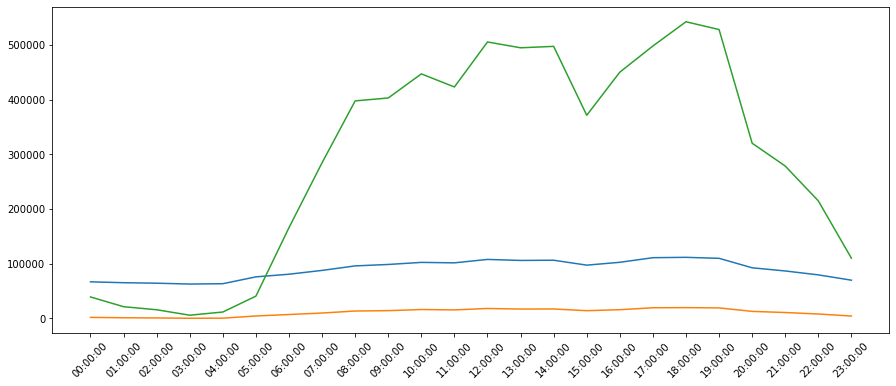

In [553]:
# plot results on a line graph
fig = plt.figure(figsize=(15, 6))
mergedd['Times'] = mergedd['Times'].astype(str)
ax1 = plt.subplot(111)
ax1.plot(mergedd.Times, mergedd.Calories)
ax1.plot(mergedd.Times, mergedd.TotalIntensity)
ax1.plot(mergedd.Times, mergedd.StepTotal)
plt.xticks(rotation=45)

<AxesSubplot:ylabel='Distance'>

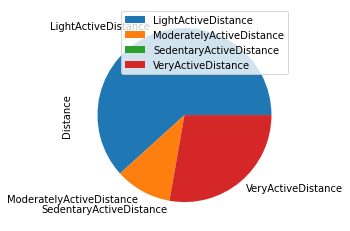

In [554]:
#Creating a pie chart
df_distance.groupby(['ActiveDistance']).sum().plot(kind='pie', y='Distance')

<AxesSubplot:ylabel='Minutes'>

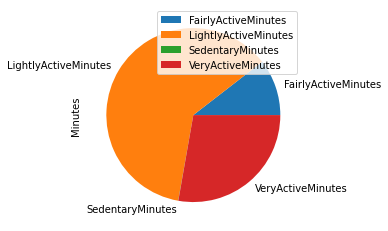

In [555]:
#Creating a pie chart
df_minutes.groupby(['ActiveMinutes']).sum().plot(kind='pie', y='Minutes')

<AxesSubplot:ylabel='Days'>

<Figure size 1008x1152 with 0 Axes>

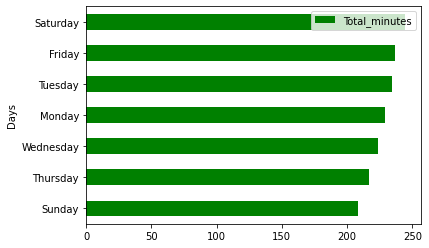

In [556]:
plt.figure(figsize=(14,16))
#df=pd.DataFrame({'allvarlist':range(5),'importances':np.random.randint(50,size=5)})
daily_sum.sort_values('Total_minutes',inplace=True)
daily_sum.plot(kind='barh',y='Total_minutes',x='Days',color='g')


<AxesSubplot:title={'center':'Favorite and Retweet'}, xlabel='TotalSteps', ylabel='Calories'>

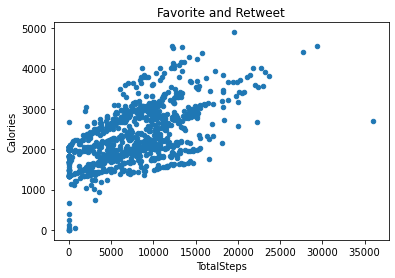

In [557]:
#Creating a scatter plot
daily_activity.plot.scatter(x='TotalSteps', y='Calories', title = 'Favorite and Retweet')

In [558]:
#Manually checking for the correlation 
daily_activity['TotalSteps'].corr(daily_activity['Calories'])

0.5915680862453355

This indicates a correlation between the total steps and calories although it is not strongly correlated